# SVR- Regression Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('credit_risk.csv')
data.head()

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1


In [4]:
data.isna().sum()

Id                  0
Age                 0
Income              0
Work Experience     0
Loan Amt            0
Rate               12
Status              0
Cred Legth          0
Outcome             0
dtype: int64

In [5]:
data=data.fillna(method='bfill')
data.isna().sum()

Id                 0
Age                0
Income             0
Work Experience    0
Loan Amt           0
Rate               0
Status             0
Cred Legth         0
Outcome            0
dtype: int64

# EDA-Visualize the data

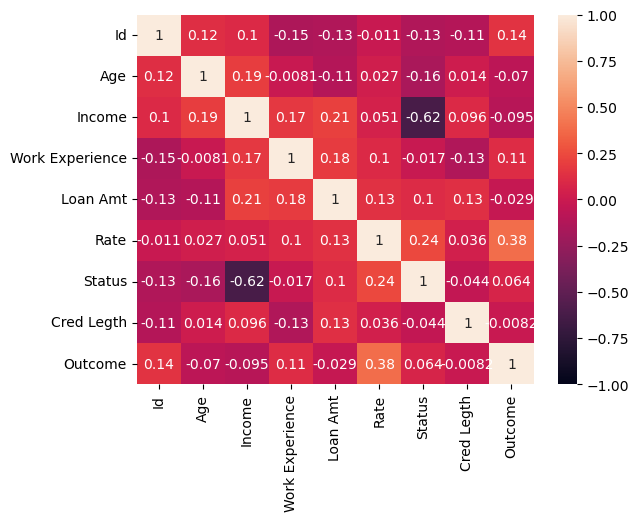

In [6]:
#plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Loan Amt'}>,
        <Axes: title={'center': 'Rate'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Cred Legth'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

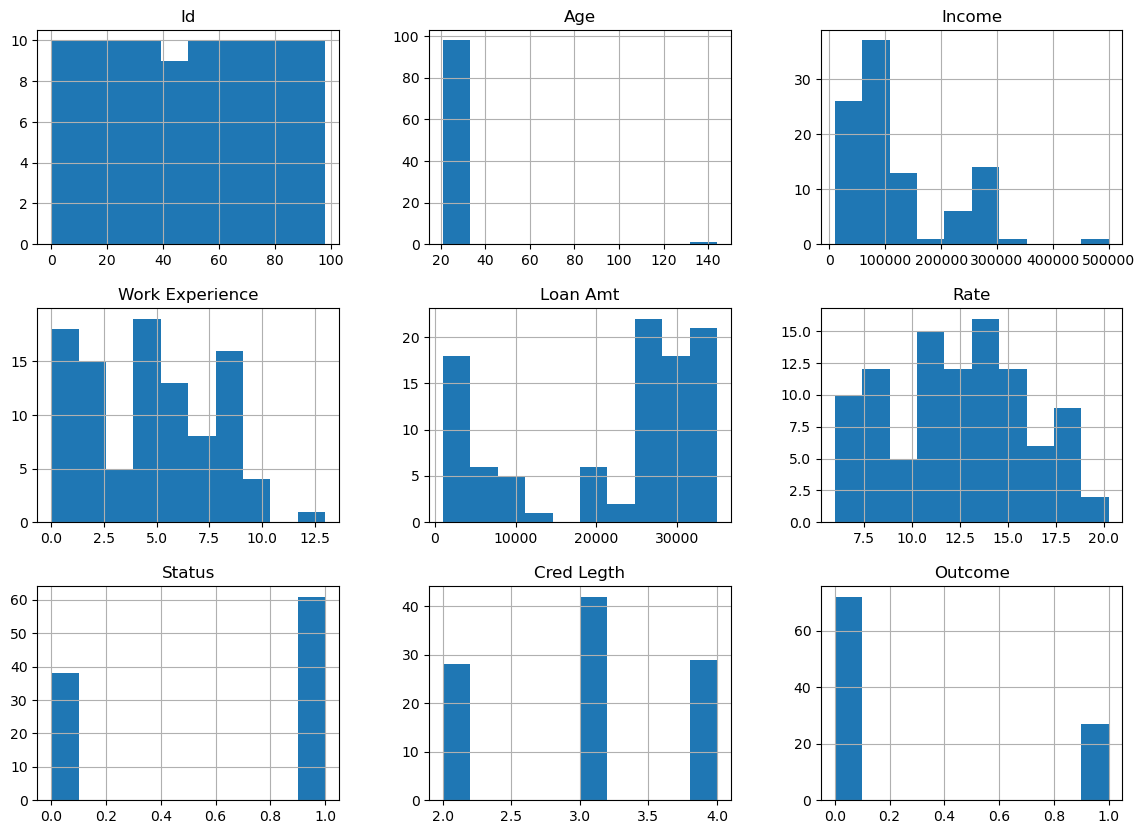

In [7]:
data.hist(figsize=(14,10))

<Axes: >

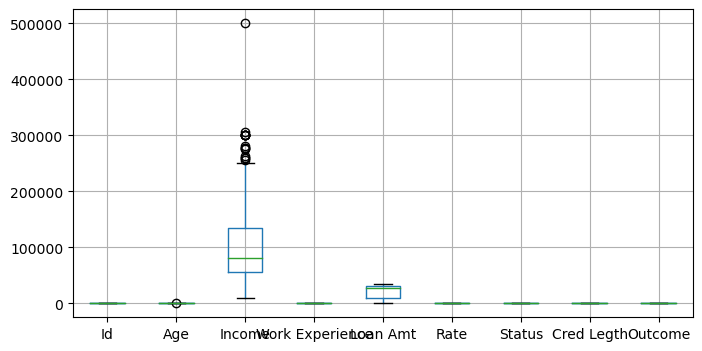

In [8]:
data.boxplot(figsize=(8,4))

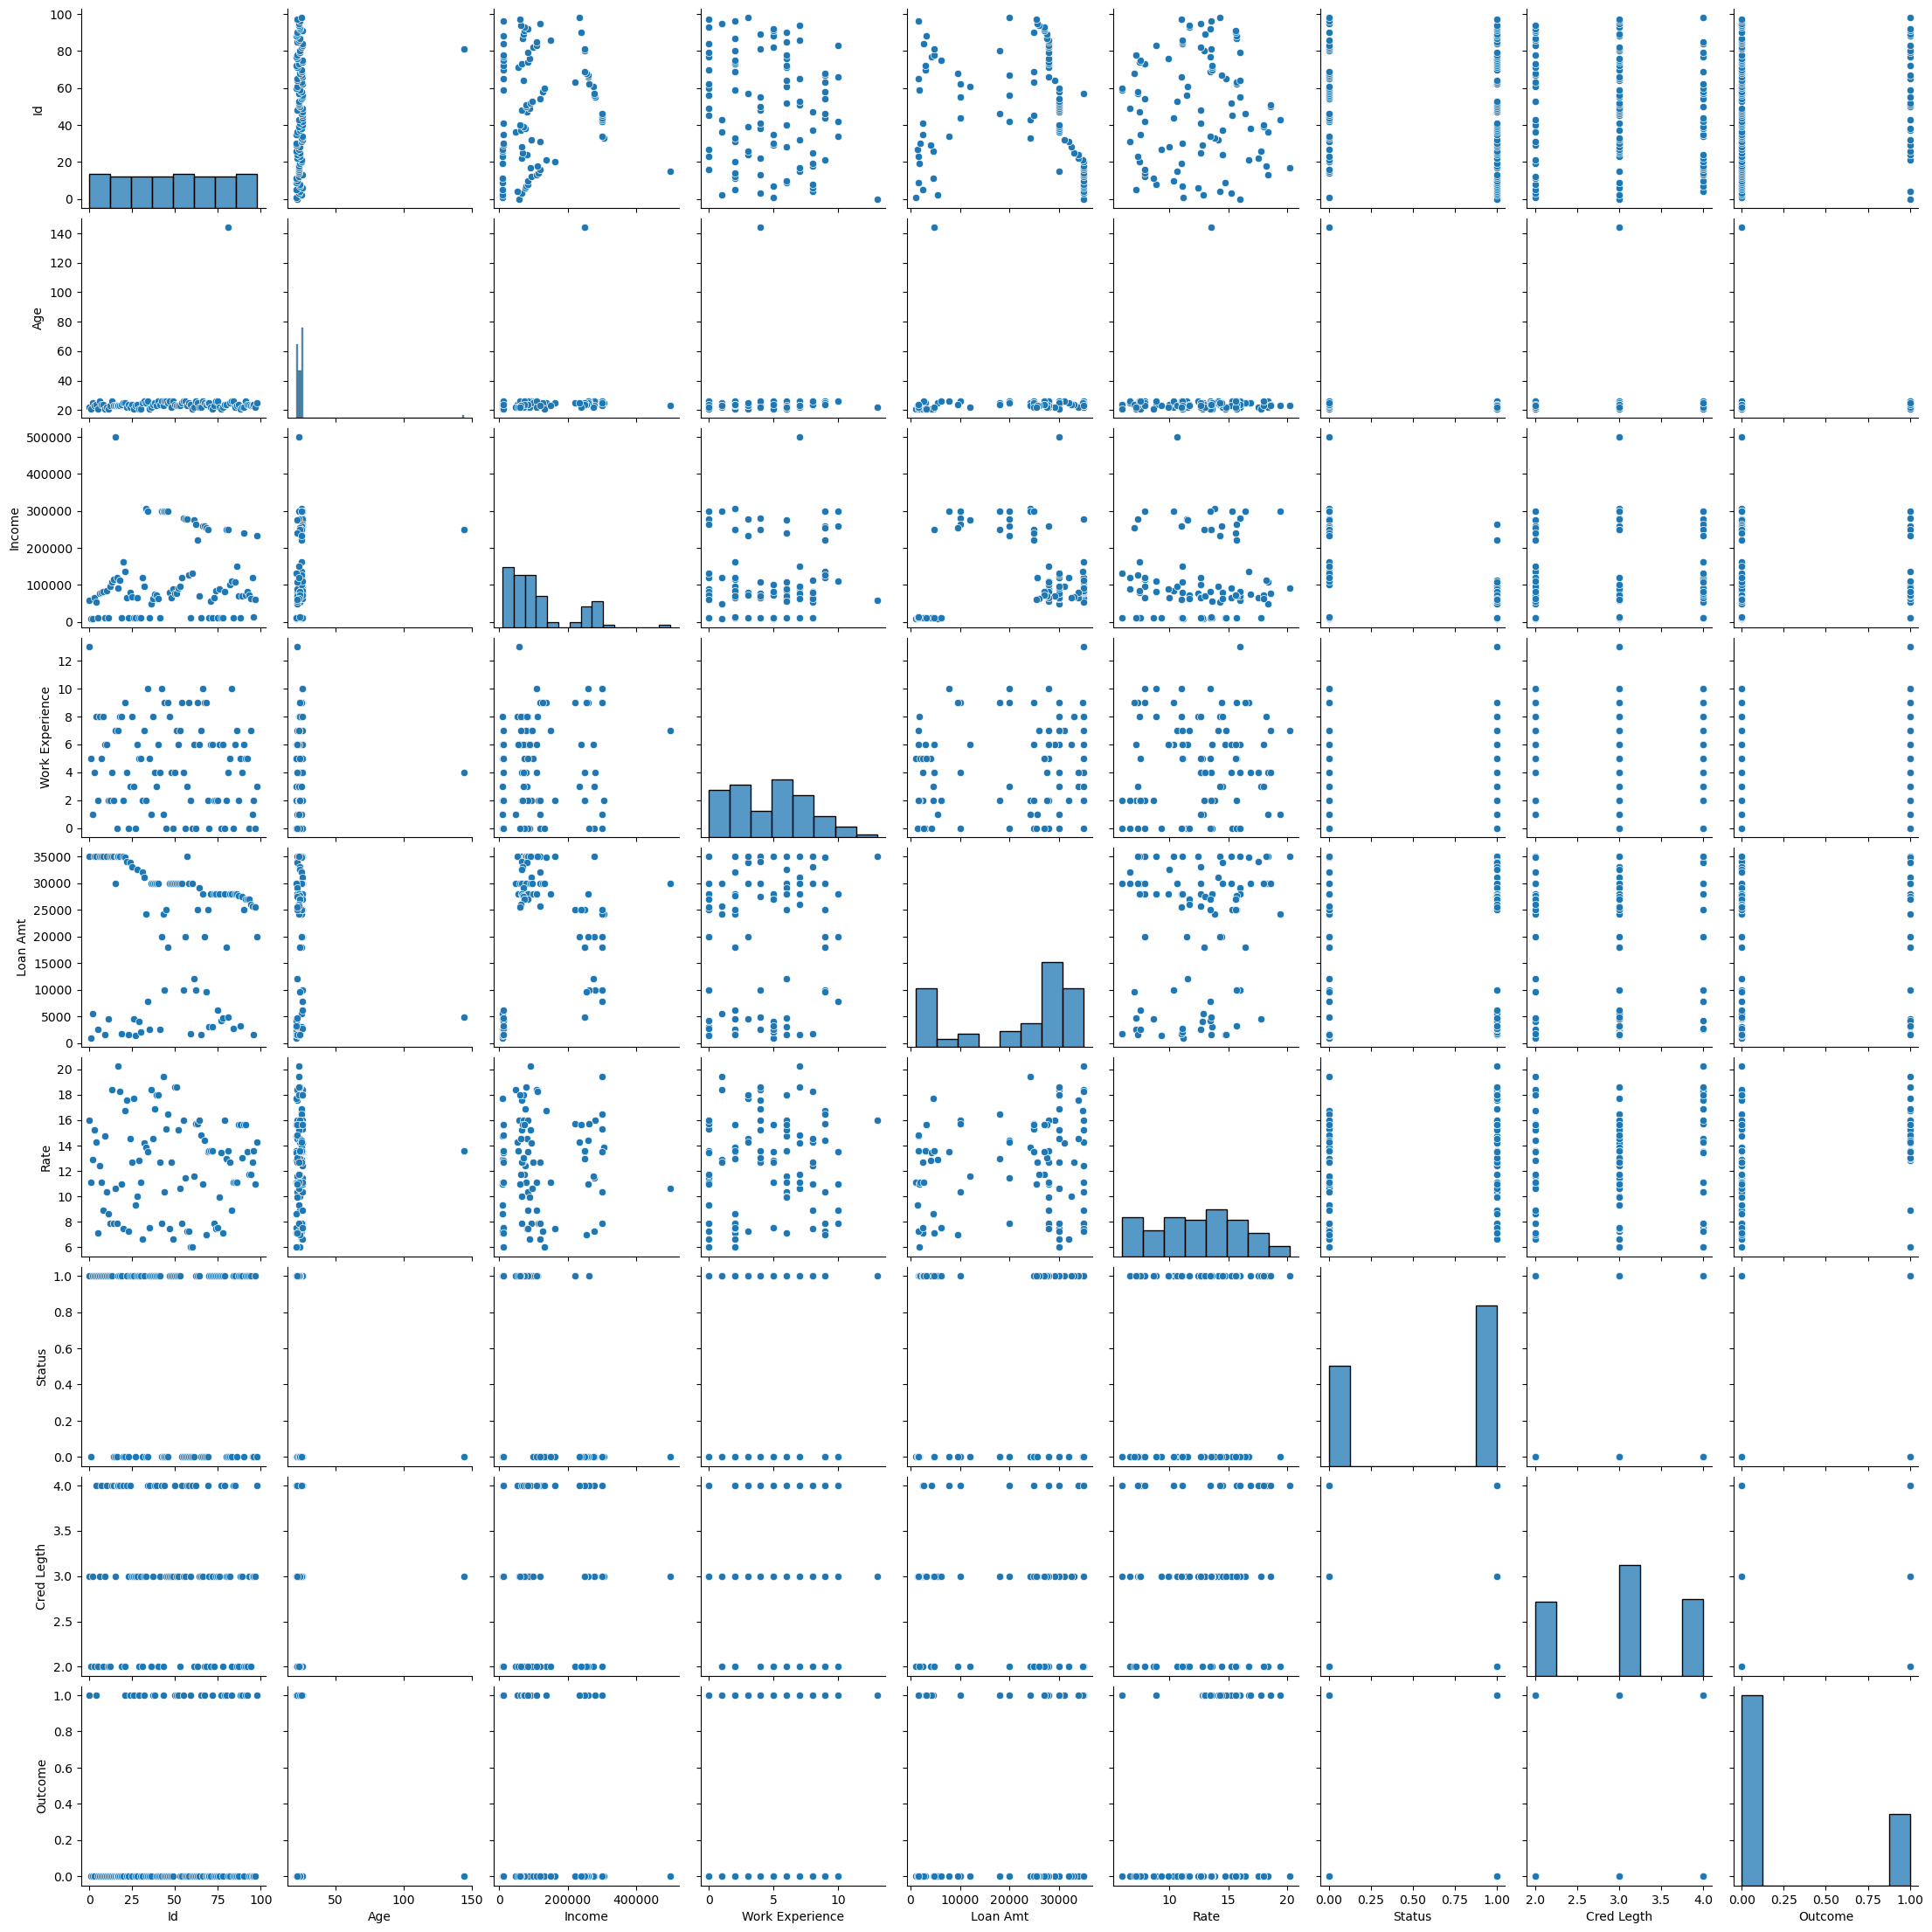

In [9]:
sns.pairplot(data)

In [10]:
data.head(4)

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0


In [11]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (99, 8)

Y shape:	 (99, 1)


In [12]:
#import svr
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (89, 8)

Training data-y- Shape:	 (89, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (10, 8)

Testing data(y-Outcome) Shape:	 (10, 1)


In [14]:
#SVR with Non linear kernal - rbf
support_reg=SVR()
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))


Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [0.09977705 0.10055428 0.09968062 0.09976971 0.10003928 0.1005636
 0.10050913 0.10056517 0.09985754 0.09988791]
Mean Squared Error:	 0.09007028887228205

RMSE:	 0.30011712525659384

R-Square value:	 -0.000780987469800376


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
#SVR with Non linear kernal - sigmoid
support_reg=SVR(kernel='sigmoid')
print('='*100)
print('Hyperparameter:\n',support_reg.get_params())
print('='*100)
#Train phase
support_reg.fit(xtrain,ytrain)
#Testing phase
ypred=support_reg.predict(xtest)
print('Predicted price:\n',ypred)
print('='*100)
#Performance measures
print('Mean Squared Error:\t',mean_squared_error(ytest,ypred))
print()
print('RMSE:\t',np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('R-Square value:\t',r2_score(ytest,ypred))

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Predicted price:
 [-1.85152622  1.63895944  9.24996946 -1.54920676 -0.05241822  1.69405772
  2.01802038  1.68792149 -1.54526869 -0.66215541]
Mean Squared Error:	 11.079509703254194

RMSE:	 3.328589746912977

R-Square value:	 -122.10566336949103


C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SVC- Classification Model

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

In [17]:
data=pd.read_csv('credit_risk.csv')
data.head()

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1


In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
data=pd.read_csv('credit_risk.csv')
data.head()

,Id,Age,Income,Work Experience,Loan Amt,Rate,Status,Cred Legth,Outcome
0,0,22,59000,13,35000,16.02,1,3,1
1,1,21,9600,5,1000,11.14,0,2,0
2,2,25,9600,1,5500,12.87,1,3,0
3,3,23,65500,4,35000,15.23,1,2,0
4,4,24,54400,8,35000,14.27,1,4,1


In [21]:
#Linear
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(xtrain, ytrain)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [22]:
y_pred = svm_classifier.predict(xtest)

In [23]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



In [26]:
#Sigmoid
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(xtrain, ytrain)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [27]:
y_pred = svm_classifier.predict(xtest)

In [28]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



In [30]:
#Non Linear
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=2)
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(xtrain, ytrain)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [31]:
y_pred = svm_classifier.predict(xtest)

In [32]:
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MEGHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from scipy import stats
%matplotlib inline

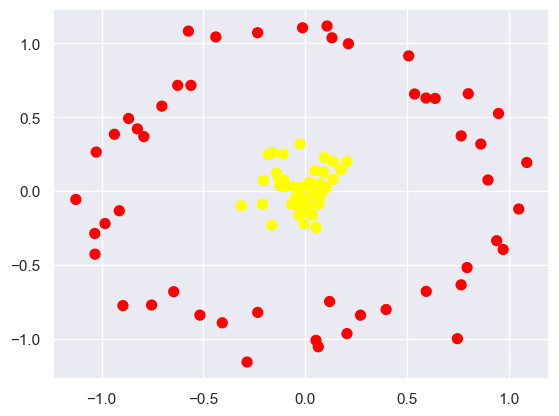

In [115]:
data=pd.read_csv('credit_risk.csv')
data.head()
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')


(-1.0, 4.0)

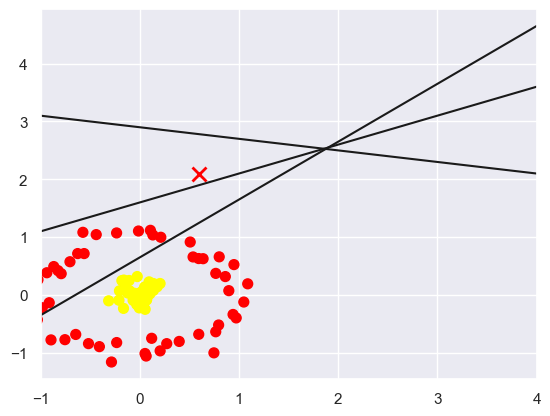

In [114]:
xfit=np.linspace(-1,4)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,4)

In [105]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x,y)
model.get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [109]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim() 
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
     # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
       levels=[-1, 0, 1], alpha=0.5,
       linestyles=['--', '-', '--'])
    
     # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
         s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

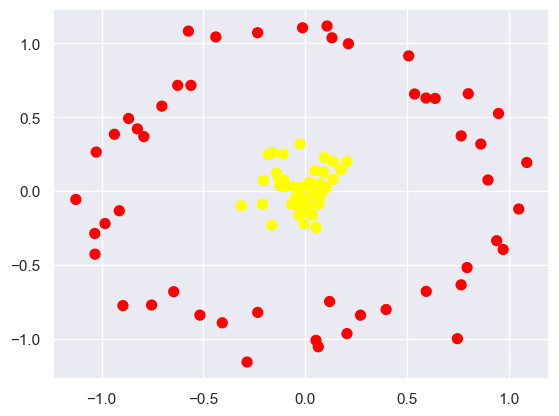

In [117]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [118]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])